In [65]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='outer', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


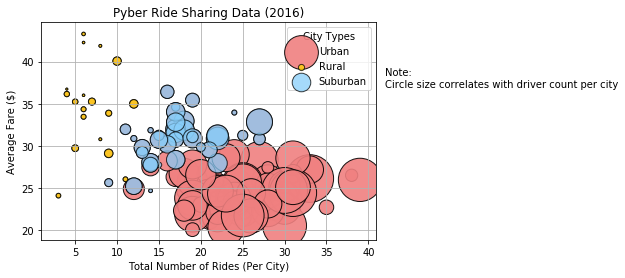

In [92]:
## BUBBLE PLOT OF RIDE SHARING DATA 

urban_data = combined_df.loc[combined_df['type'] == "Urban"]
city_urban_data = combined_df.groupby('city')
rural_data = combined_df.loc[combined_df['type'] == "Rural"]
city_rural_data = rural_data.groupby('city')
suburban_data = combined_df.loc[combined_df['type'] == "Suburban"]
city_suburban_data = suburban_data.groupby('city')


# Obtain the x and y coordinates for each of the three city types
driver_count_urban = city_urban_data['driver_count'].sum()
y_axis_urban = city_urban_data['fare'].mean()
x_axis_urban = city_urban_data['fare'].count()

driver_count_rural = city_rural_data['driver_count'].sum()
y_axis_rural = city_rural_data['fare'].mean()
x_axis_rural = city_rural_data['fare'].count()

driver_count_suburban = city_suburban_data['driver_count'].sum()
y_axis_suburban = city_suburban_data['fare'].mean()
x_axis_suburban = city_suburban_data['fare'].count()


# Build the scatter plots for each city types
urban_plot = plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="lightcoral", edgecolors="black", 
                         s=driver_count_urban, alpha=0.90, label = "Urban")
rural_plot = plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="gold", edgecolors="black", 
                         s=driver_count_rural, alpha=0.75, label = "Rural")
suburban_plot = plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", 
                            s=driver_count_suburban, alpha=0.75, label = "Suburban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
plt.legend(handles=[urban_plot, rural_plot, suburban_plot], title = "City Types", loc = "best")


# Incorporate a text label regarding circle size
plt.text(42,37,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.grid()
plt.savefig("Pyber Ride Sharing Data.png")
plt.show()


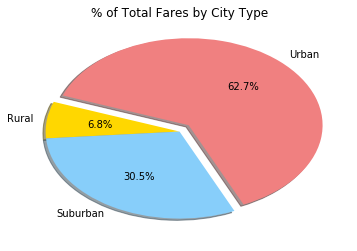

In [84]:
## TOTAL FARES BY CITY TYPE

# Calculate Type Percents
city_type_data = combined_df.groupby('type')
fares_data = pd.DataFrame(city_type_data['fare'].sum())
total_fares = fares_data['fare'].sum()
fares_data['Type Percentage'] = (fares_data['fare'] / total_fares) * 100
fares_data['Type Percentage'] = fares_data['Type Percentage'].map("{:,.2f}%".format)

# Build Pie Chart
city_type = ['Rural', 'Suburban', 'Urban']
city_type_fares = [fares_data['fare'][0], fares_data['fare'][1], fares_data['fare'][2]]
city_type_fares
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.10)
plt.pie(city_type_fares, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Fares by City Type')
plt.show

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

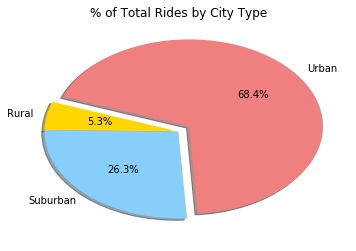

In [85]:
## TOTAL RIDES BY CITY TYPE

# Calculate Ryde Percents
rides_data = pd.DataFrame(city_type_data['ride_id'].count())
total_rides = rides_data['ride_id'].sum()
rides_data['Type Percentage'] = (rides_data['ride_id'] / total_rides) * 100
rides_data['Type Percentage'] = rides_data['Type Percentage'].map("{:,.2f}%".format)

# Build Pie Chart
city_type = ['Rural', 'Suburban', 'Urban']
city_type_rides = [rides_data['ride_id'][0], rides_data['ride_id'][1], rides_data['ride_id'][2]]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.10)
plt.pie(city_type_rides, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Rides by City Type')
plt.show

#Save Figure
plt.savefig("% of Total Rides by City Type.png")

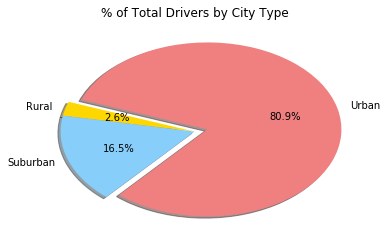

In [86]:
## TOTAL DRIVERS BY CITY TYPE

# Calculate Driver Percents
city_data = city_df.groupby('type')
drivers_data = pd.DataFrame(city_data['driver_count'].sum())
total_drivers = drivers_data['driver_count'].sum()
drivers_data['Type Percentage'] = (drivers_data['driver_count'] / total_drivers) * 100
drivers_data['Type Percentage'] = drivers_data['Type Percentage'].map("{:,.2f}%".format)

# Build Pie Charts
city_type = ['Rural', 'Suburban', 'Urban']
city_type_drivers = [drivers_data['driver_count'][0], drivers_data['driver_count'][1], drivers_data['driver_count'][2]]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.10)
plt.pie(city_type_drivers, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Drivers by City Type')
plt.show

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")